In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import os

In [40]:
df = pd.read_excel('/kaggle/input/dataset-transportation/Data_Rail_clean.xlsx')

In [41]:
df.columns = df.columns.str.strip()

In [42]:
df = df.rename(columns={'Month.1': 'Month'})

In [43]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-43-15c3a53ef2d8>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [44]:
# Drop rows where Year is 2025
df = df[df['Year'] != 2025]

# Confirm removal
year_counts = df['Year'].value_counts().sort_index()
year_counts


Year
2020    6625
2021    7325
2022    7665
2023    7877
2024    8383
Name: count, dtype: int64

In [45]:
df.head(5)

,Travel Mode,Purpose,Public Mode,Vehicle,Month,Unit,Quantity,Day,Month,Year
0,Road,Provincial,Public,รถ ขบส. และ รถร่วม,2020-01-01,Person,233330.0,1,Jan,2020
1,Road,Provincial,Private,รถยนต์เฉพาะ 4 ล้อ (10 จุดสำรวจ),2020-01-01,Unit,977347.0,1,Jan,2020
2,Road,Provincial,Private,รถยนต์ทุกประเภท (10 จุดสำรวจ),2020-01-01,Unit,1072314.0,1,Jan,2020
3,Road,Provincial,Private,รถยนต์เฉพาะ 4 ล้อ (ทางด่วน),2020-01-01,Unit,1333059.0,1,Jan,2020
4,Road,Provincial,Private,รถยนต์ทุกประเภท (ทางด่วน),2020-01-01,Unit,1353179.0,1,Jan,2020


# Graph 1 Total Quantity by Travel Mode per Year (Bangkok and Provincial)

In [46]:
import os
os.makedirs("images", exist_ok=True)

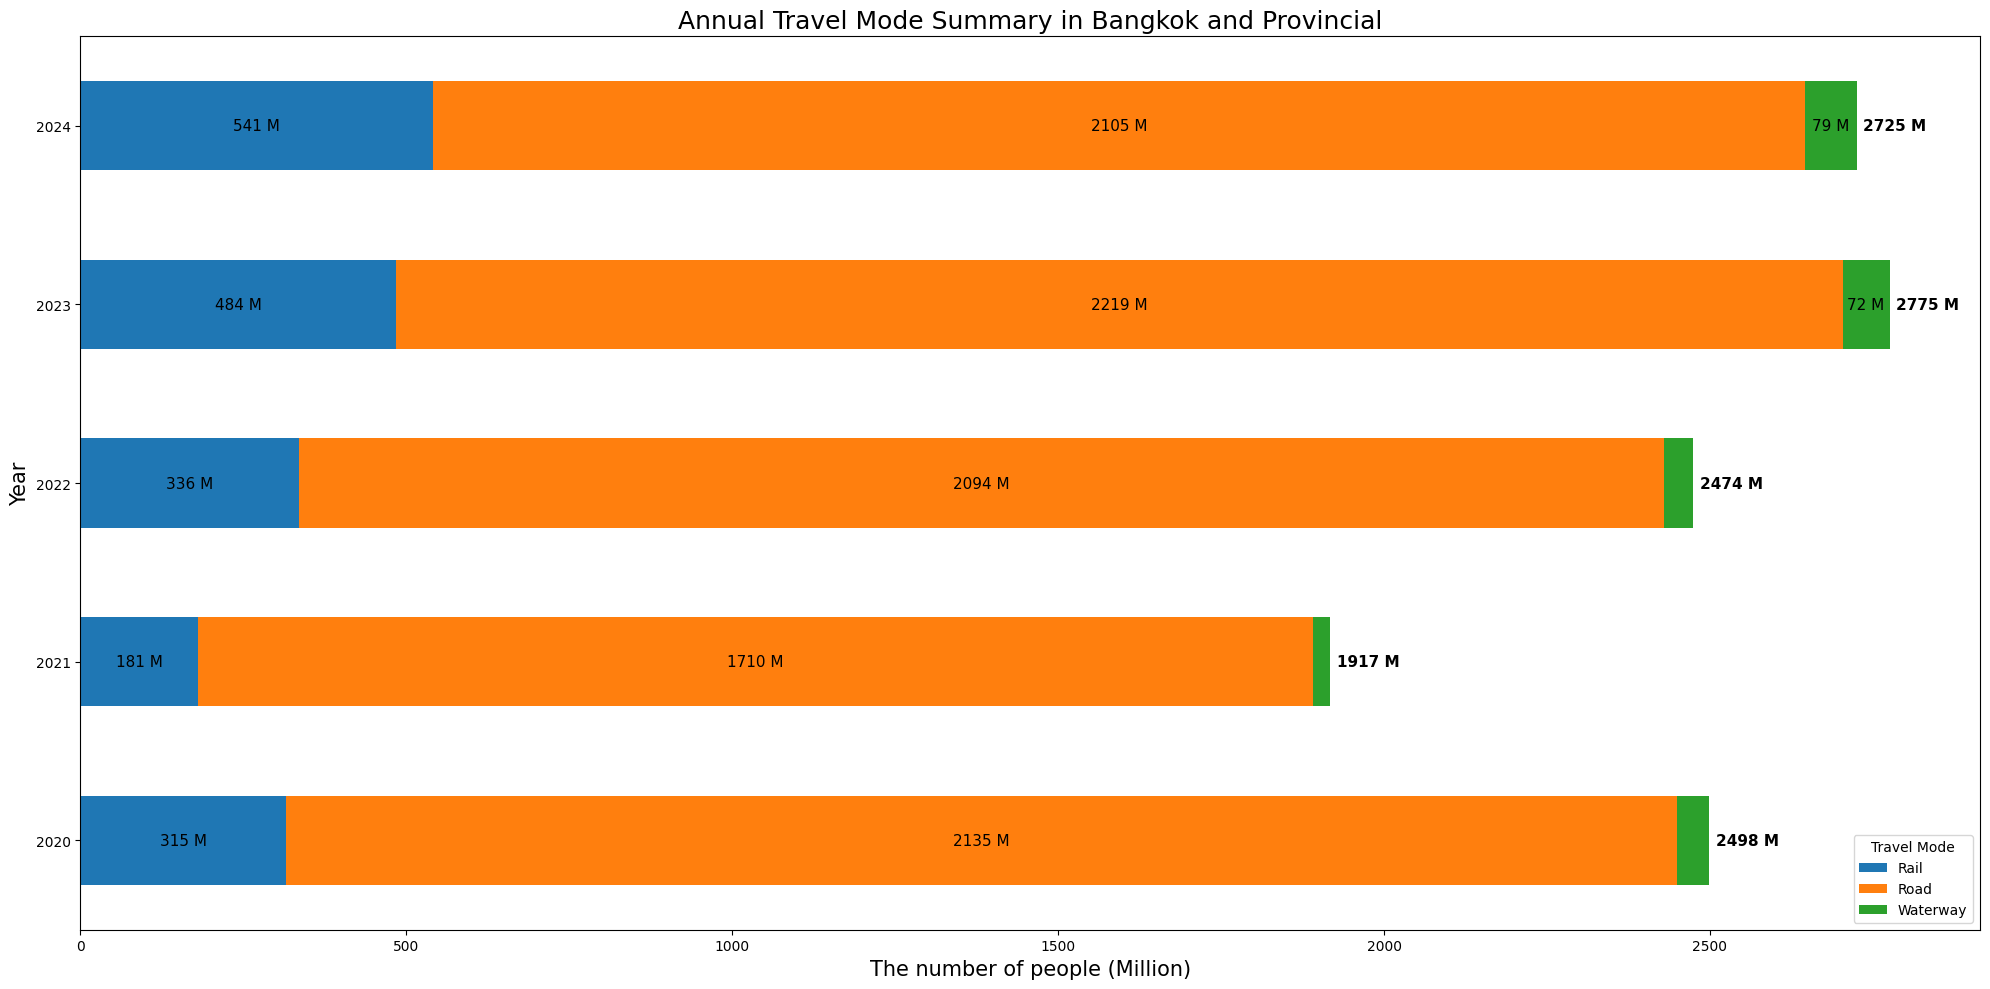

In [47]:
grouped_abs = df.groupby(['Year', 'Travel Mode'])['Quantity'].sum().unstack().fillna(0)

grouped_pct = grouped_abs.div(grouped_abs.sum(axis=1), axis=0) * 100

plt.figure(figsize=(20, 10), dpi=100)
ax = plt.gca()

grouped_abs.plot(kind='barh', stacked=True, ax=ax, title='Annual Travel Mode Summary in Bangkok and Provincial')

for i, year in enumerate(grouped_pct.index):
    left = 0
    for mode in grouped_pct.columns:
        width = grouped_abs.loc[year, mode]
        pct = grouped_pct.loc[year, mode]
        if pct > 2:
            ax.text(left + width / 2, i, f"{width * 1e-6:.0f} M", ha='center', va='center', fontsize=11)
        left += width

for i, year in enumerate(grouped_abs.index):
    total = grouped_abs.loc[year].sum()
    ax.text(total + 10_000_000, i, f"{total * 1e-6:.0f} M", va='center', fontsize=11, fontweight='bold')


ax.set_xlabel('The number of people (Million)',fontsize=15)
ax.set_ylabel('Year',fontsize=15)
ax.set_title('Annual Travel Mode Summary in Bangkok and Provincial', fontsize=18)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 1e-6:.0f}'))

plt.tight_layout()
plt.savefig("images/travel_mode_quantity.png", dpi=300)
plt.show()

In [48]:
 df_bangkok = df[df['Purpose'] == 'Bangkok']

In [49]:
df_bangkok.head(10)

,Travel Mode,Purpose,Public Mode,Vehicle,Month,Unit,Quantity,Day,Month,Year
5,Road,Bangkok,Public,รถเมล์ ขสมก.,2020-01-01,Person,785727.0,1,Jan,2020
6,Road,Bangkok,Public,รถร่วม (หมวด 1),2020-01-01,Person,464198.0,1,Jan,2020
7,Waterway,Bangkok,Public,เรือด่วนเจ้าพระยา,2020-01-01,Person,29518.0,1,Jan,2020
8,Waterway,Bangkok,Public,เรือคลองแสนแสบ,2020-01-01,Person,20420.0,1,Jan,2020
9,Waterway,Bangkok,Public,เรือภูมิภาค,2020-01-01,Person,222640.0,1,Jan,2020
11,Rail,Bangkok,Public,Blue Line MRT,2020-01-01,Person,236053.0,1,Jan,2020
12,Rail,Bangkok,Public,Purple Line MRT,2020-01-01,Person,23135.0,1,Jan,2020
13,Rail,Bangkok,Public,Airport Rail Link,2020-01-01,Person,48790.0,1,Jan,2020
14,Rail,Bangkok,Public,BTS Skytrain,2020-01-01,Person,461400.0,1,Jan,2020
20,Road,Bangkok,Public,รถเมล์ ขสมก.,2020-01-02,Person,959677.0,2,Jan,2020


# Graph 2 Total Quantity by Travel Mode per Year (Bangkok)

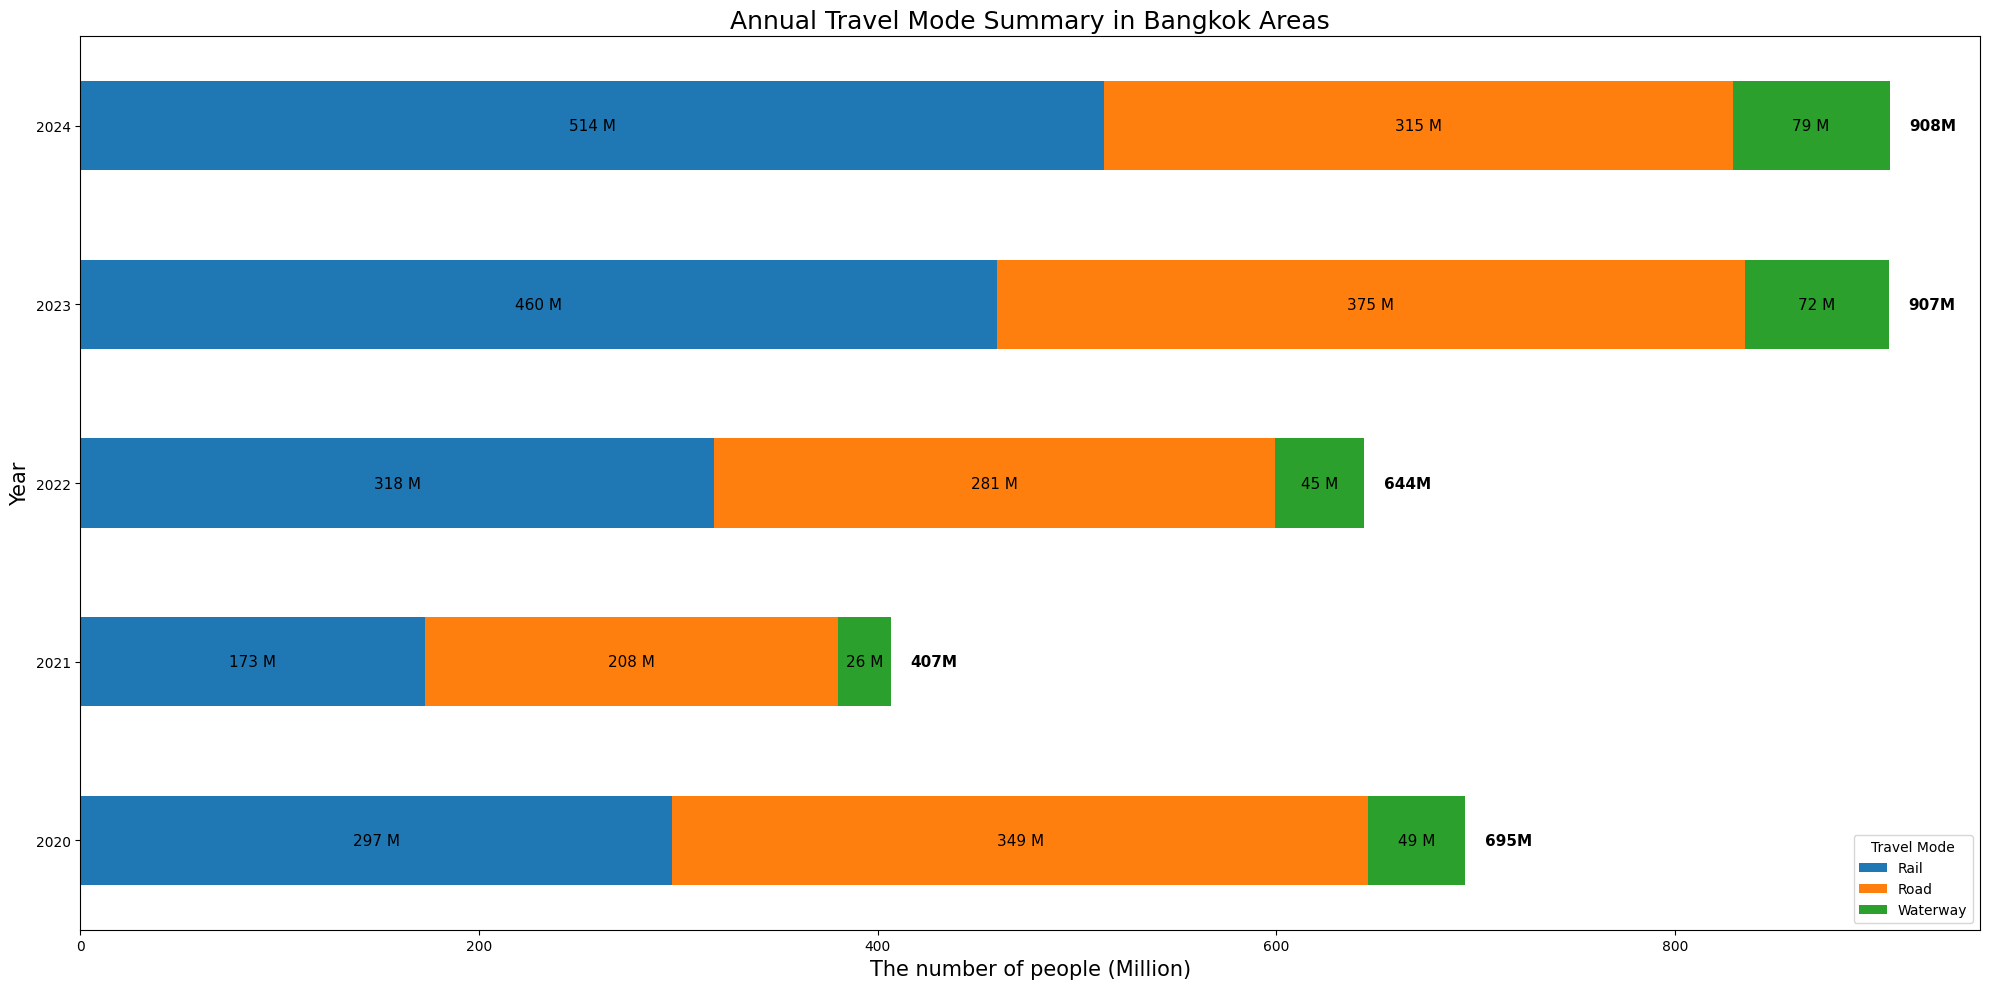

In [50]:
grouped_abs = df_bangkok.groupby(['Year', 'Travel Mode'])['Quantity'].sum().unstack().fillna(0)
grouped_pct = grouped_abs.div(grouped_abs.sum(axis=1), axis=0) * 100

plt.figure(figsize=(20, 10), dpi=100)
ax = plt.gca()

grouped_abs.plot(kind='barh', stacked=True, ax=ax, title='Annual Travel Mode Summary in Bangkok Areas')

# Add percent labels on the bars
for i, year in enumerate(grouped_pct.index):
    left = 0
    for mode in grouped_pct.columns:
        width = grouped_abs.loc[year, mode]
        pct = grouped_pct.loc[year, mode]
        if pct > 5:
            ax.text(left + width / 2, i, f"{width * 1e-6:.0f} M", ha='center', va='center', fontsize=11)
        left += width

for i, year in enumerate(grouped_abs.index):
    total = grouped_abs.loc[year].sum()
    ax.text(total + 10_000_000, i, f"{total * 1e-6:.0f}M", va='center', fontsize=11, fontweight='bold', color='black')


ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 1e-6:.0f}'))

ax.set_xlabel('The number of people (Million)',fontsize=15)

ax.set_ylabel('Year',fontsize=15)

ax.set_title('Annual Travel Mode Summary in Bangkok Areas', fontsize=18)
plt.tight_layout()
plt.savefig("images/travel_mode_quantit2.png", dpi=300)
plt.show()


# Graph 3 Total Quantity by Travel Mode per Year (Bangkok)

In [51]:
vehicle_to_group = {
    'BTS Skytrain': 'BTS',
    'Airport Rail Link': 'BTS',
    'Red Line Train': 'BTS',
    'Blue Line MRT': 'MRT',
    'Purple Line MRT': 'MRT',
    'Yellow Line MRT': 'MRT',
    'Pink Line MRT': 'MRT'
}

df_bangkok = df[df['Purpose'].str.strip() == 'Bangkok'].copy()
df_bangkok.loc[:, 'Vehicle'] = df_bangkok['Vehicle'].str.strip()
df_bangkok.loc[:, 'Rail Group'] = df_bangkok['Vehicle'].map(vehicle_to_group)
df_rail_grouped = df_bangkok[df_bangkok['Rail Group'].notna()]
grouped_rail = df_rail_grouped.groupby(['Year', 'Rail Group'])['Quantity'].sum().unstack().fillna(0)
grouped_rail


Rail Group,BTS,MRT
Year,,
2020,196769451.0,100181055.0
2021,116450394.0,56259280.0
2022,215858311.0,102126657.0
2023,296859615.0,163045540.0
2024,302812745.0,211064720.0


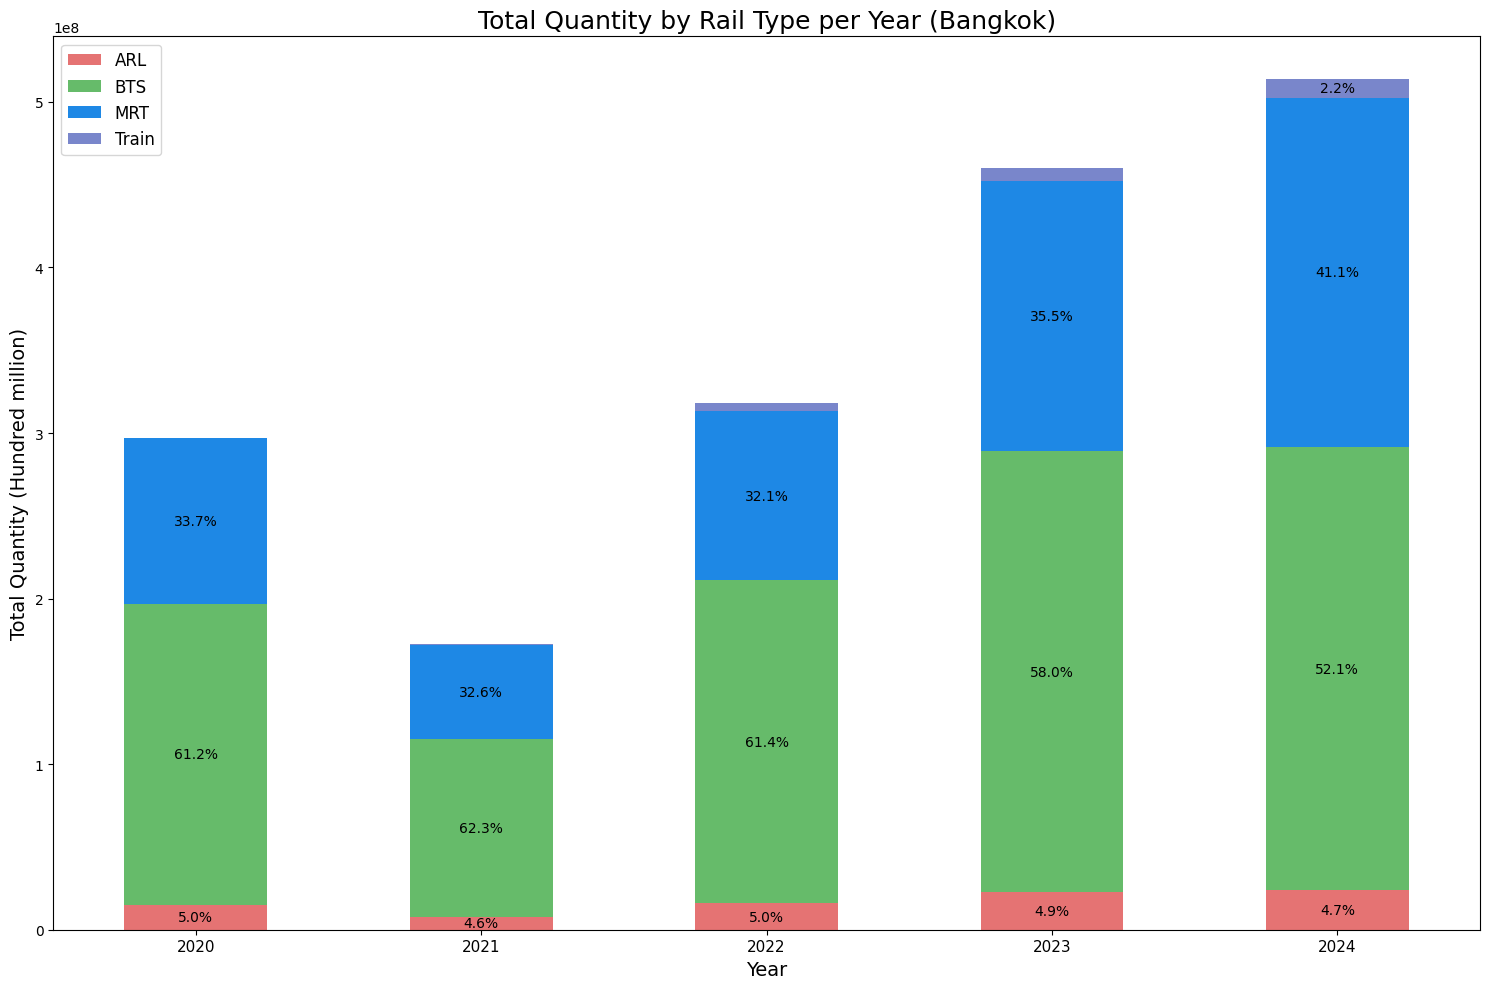

In [52]:
color_map = {
    'BTS': '#e57373',     # arl
    'MRT': '#66bb6a',     # bts
    'ARL': '#1e88e5',     # mrt
    'Train': '#7986cb'    # train
}
colors = [color_map[col] for col in grouped_type.columns]
df_bangkok.loc[:, 'Vehicle'] = df_bangkok['Vehicle'].str.strip()

vehicle_to_type = {
    'BTS Skytrain': 'BTS',
    'Red Line Train': 'Train',
    'Train': 'Train',
    'Airport Rail Link': 'ARL',
    'Blue Line MRT': 'MRT',
    'Purple Line MRT': 'MRT',
    'Yellow Line MRT': 'MRT',
    'Pink Line MRT': 'MRT'
}

df_bangkok.loc[:, 'Rail Type'] = df_bangkok['Vehicle'].map(vehicle_to_type)
unmapped_vehicle = df_bangkok[df_bangkok['Rail Type'].isna()]['Vehicle'].unique()
df_type_grouped = df_bangkok[df_bangkok['Rail Type'].notna()]
grouped_type = df_type_grouped.groupby(['Year', 'Rail Type'])['Quantity'].sum().unstack().fillna(0)
grouped_pct = grouped_type.div(grouped_type.sum(axis=1), axis=0) * 100
plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
grouped_type.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Total Quantity by Rail Type per Year (Bangkok)', fontsize=18)


for i, year in enumerate(grouped_pct.index):
    bottom = 0
    for rtype in grouped_pct.columns:
        height = grouped_type.loc[year, rtype]
        pct = grouped_pct.loc[year, rtype]
        if pct > 2:
            ax.text(i, bottom + height / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=10)
        bottom += height

ax.set_ylabel('Total Quantity (Hundred million)', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_xticklabels(grouped_type.index, rotation=45, fontsize=11)
ax.set_xticklabels(grouped_rail.index, rotation=360)
plt.tight_layout()

ax.legend(loc='upper left', fontsize=12)

plt.show()
rail_order = grouped_type.sum().sort_values(ascending=False).index.tolist()
grouped_type = grouped_type[rail_order]
grouped_pct = grouped_type.div(grouped_type.sum(axis=1), axis=0) * 100



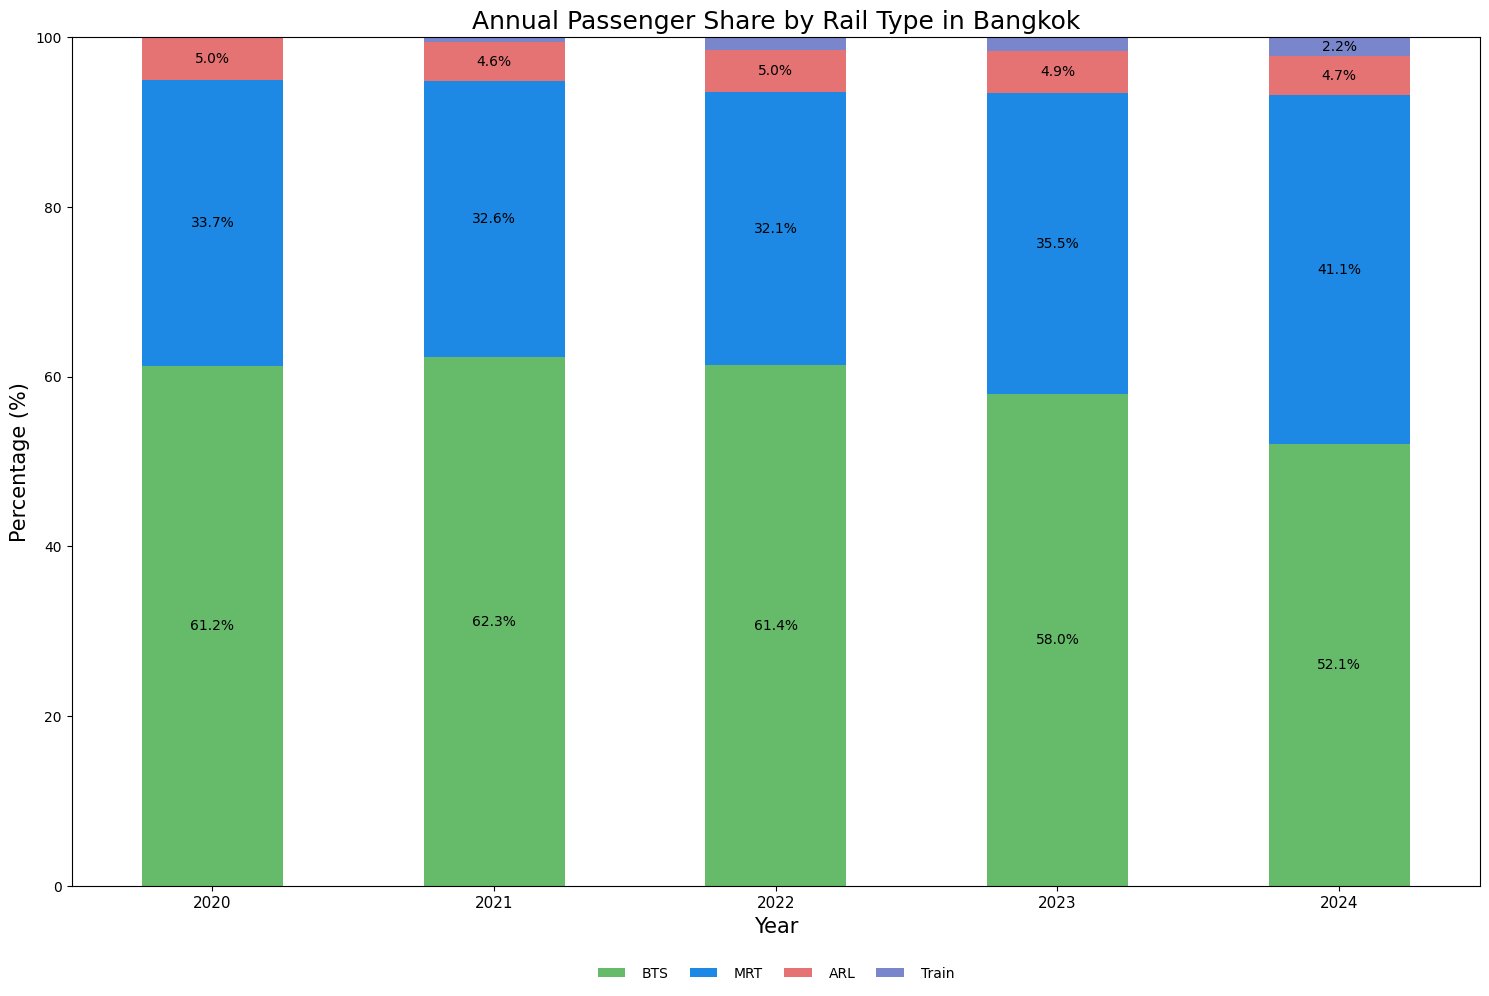

In [53]:
plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()

color_map = {
    'BTS': '#66bb6a',     # train
    'MRT': '#1e88e5',     # apl
    'ARL': '#e57373',     # mrt
    'Train': '#7986cb'    # bts
}
colors = [color_map[col] for col in grouped_pct.columns]

grouped_pct.plot(kind='bar', stacked=True, ax=ax , color=colors)
for i, year in enumerate(grouped_pct.index):
    bottom = 0
    for rtype in grouped_pct.columns:
        height = grouped_pct.loc[year, rtype]
        if height > 2:
            ax.text(i, bottom + height / 2, f"{height:.1f}%", ha='center', va='center', fontsize=10)
        bottom += height


ax.set_ylabel('Percentage (%)', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylim(0, 100)
ax.set_xticklabels(grouped_pct.index, rotation=0, fontsize=11)
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.08),  
    ncol=4,                      
    fontsize=10,
    columnspacing=1.5,
    handletextpad=1.2,
    frameon=False                
)


ax.set_title('Annual Passenger Share by Rail Type in Bangkok', fontsize=18)
plt.tight_layout()
plt.savefig("images/rail_type_share_percent4.png", dpi=300)
plt.show()
